In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df=pd.read_csv('/content/drive/MyDrive/30 projects/car_prediction_data+Code/car_prediction_data.csv')

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df.shape

(301, 9)

In [17]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
final_dataset['Current_Year']=2021

In [22]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [23]:
final_dataset['no_year']=final_dataset['Current_Year']- final_dataset['Year']

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [24]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [25]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [26]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [27]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [28]:
final_dataset=final_dataset.drop(['Current_Year'],axis=1)

In [29]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [31]:
import seaborn as sns

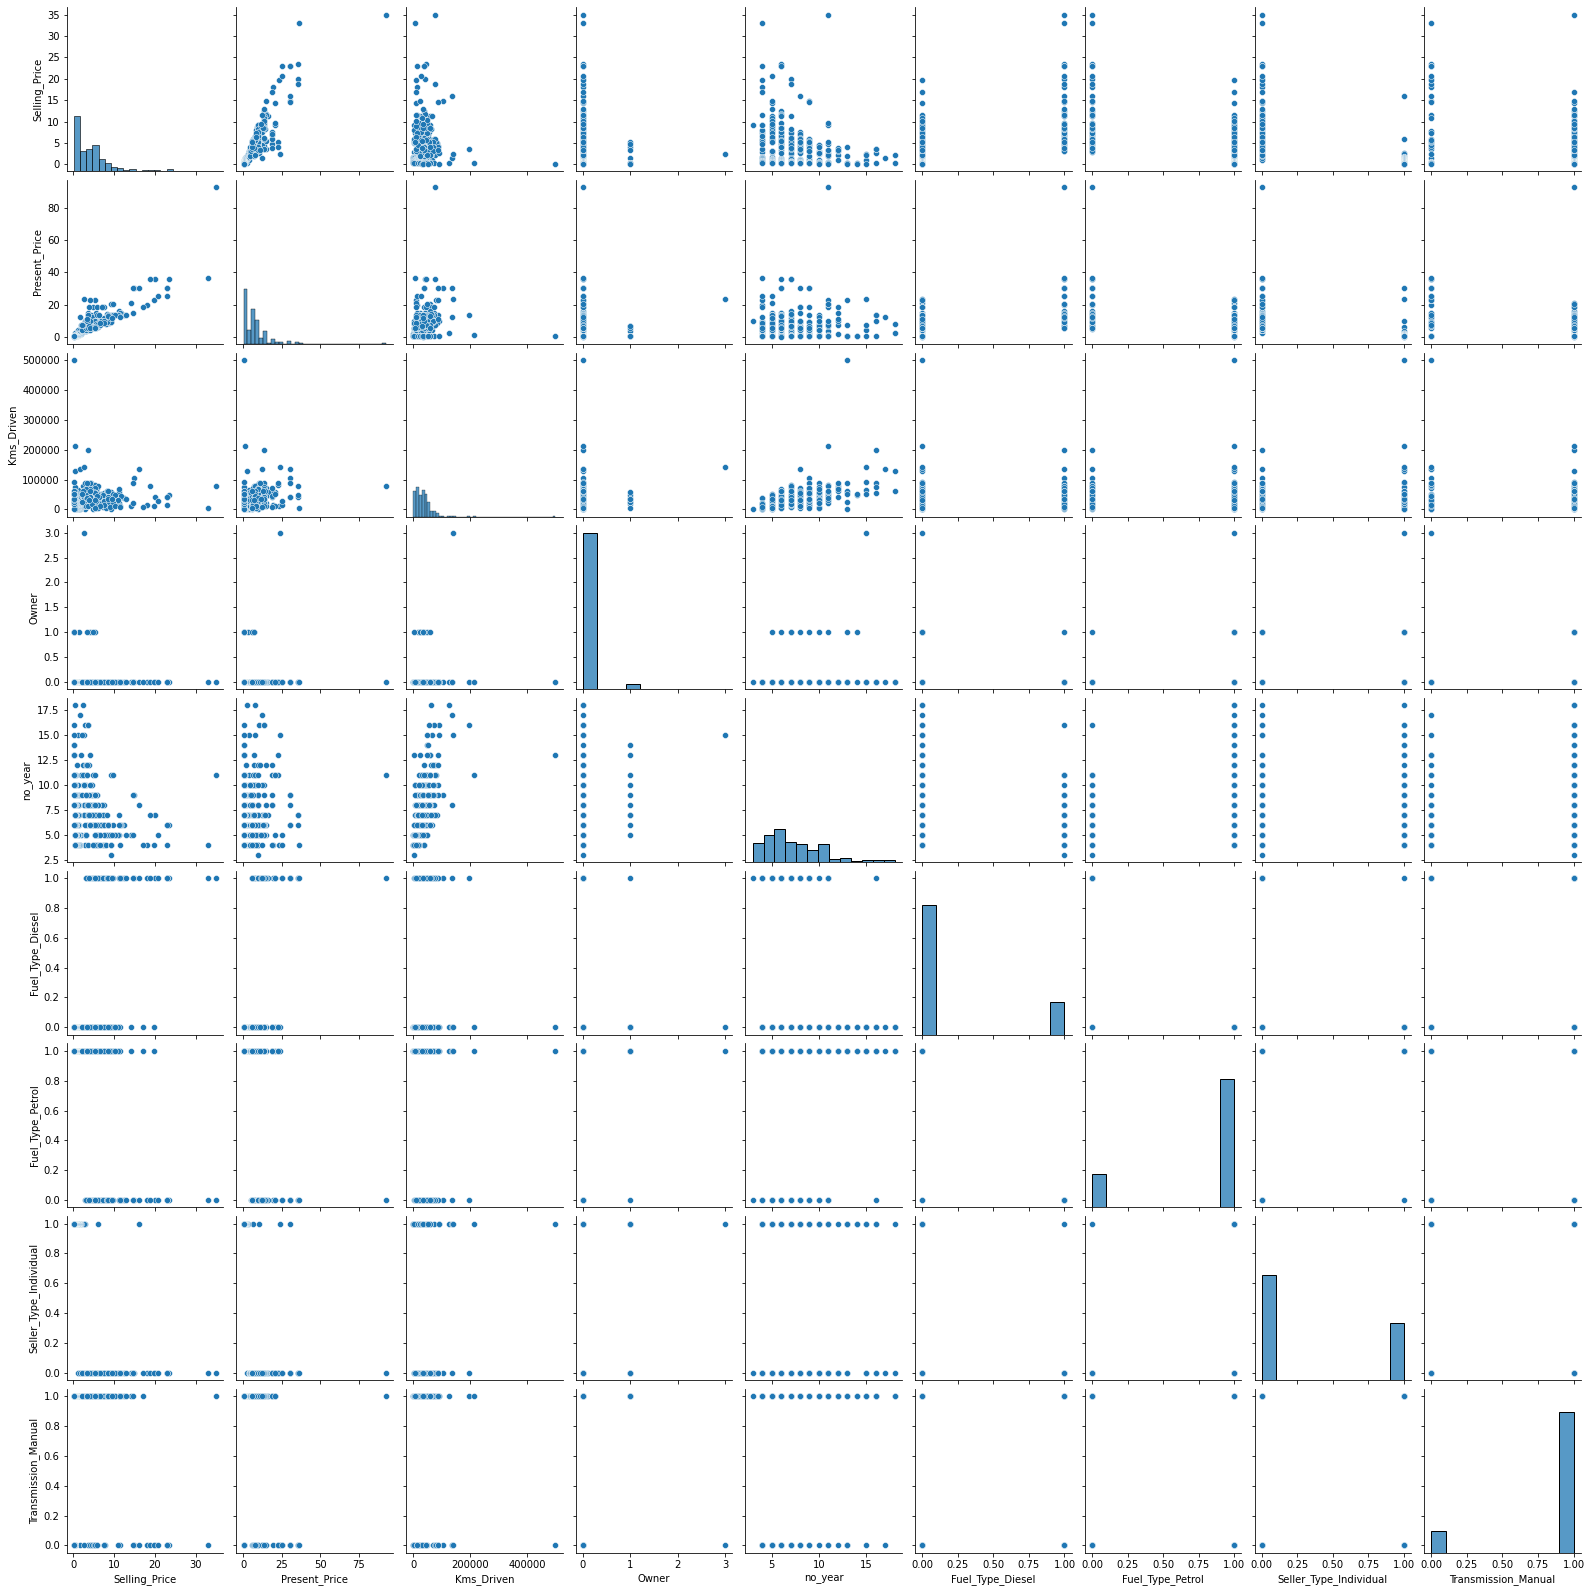

In [32]:
sns.pairplot(final_dataset)

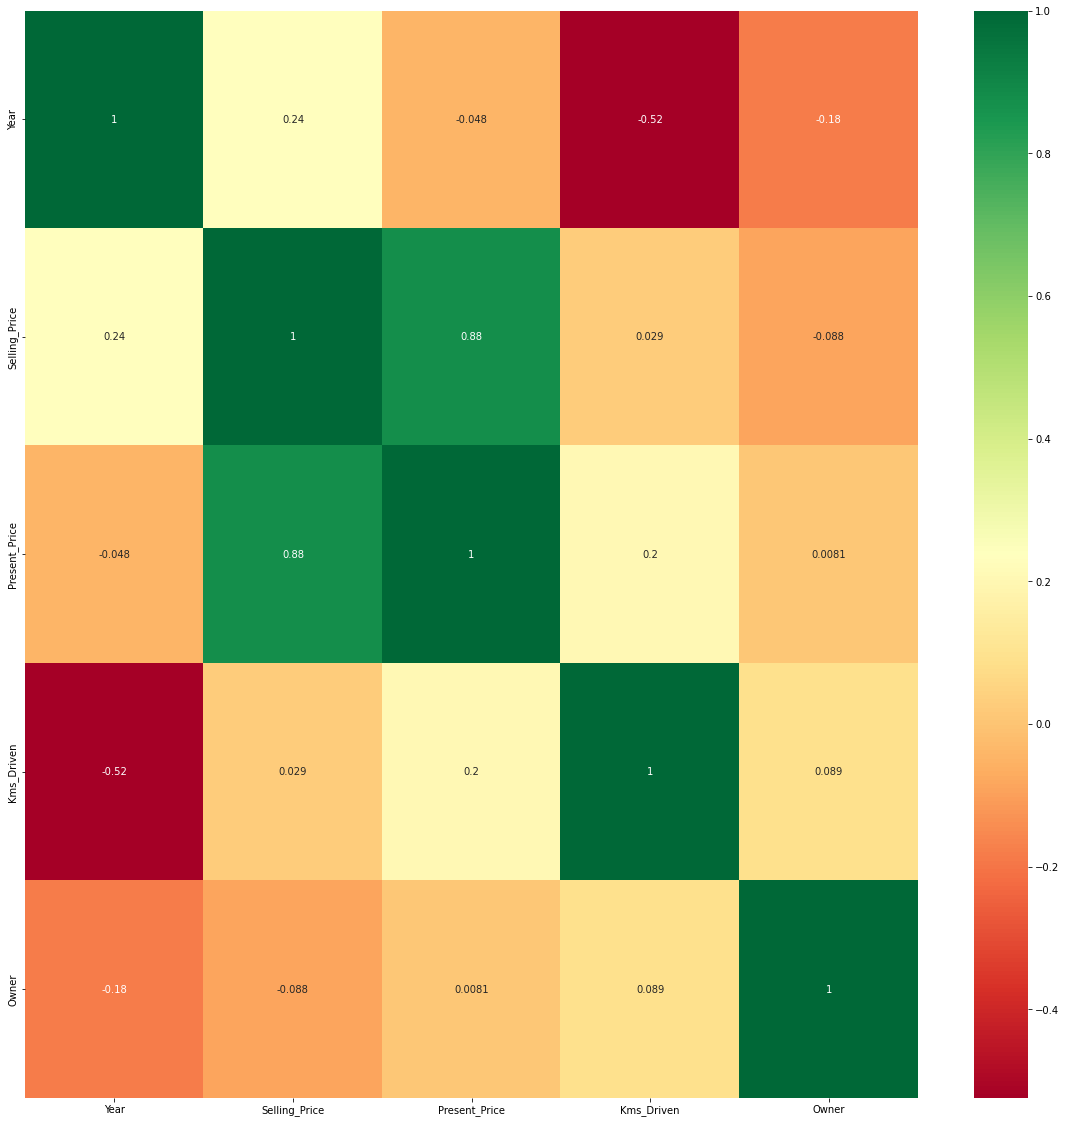

In [33]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [35]:
X['Owner'].unique()

array([0, 1, 3])

In [36]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [37]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Feature Importance

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [39]:
print(model.feature_importances_)

[0.36515208 0.04094677 0.00083738 0.07584979 0.24002885 0.01221561
 0.12443295 0.14053656]


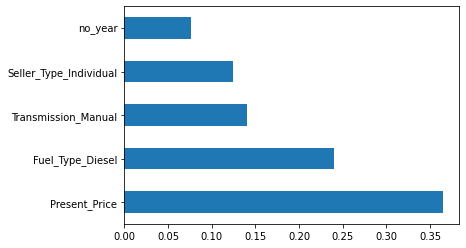

In [40]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Using Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
regressor=RandomForestRegressor()

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
 #Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [98]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [99]:
rf = RandomForestRegressor()

In [100]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [101]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [102]:
rf.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [103]:
rf.best_score_

-4.058776136789062

In [104]:
predictions=rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


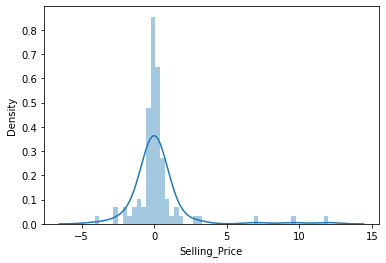

In [105]:
sns.distplot(y_test-predictions)

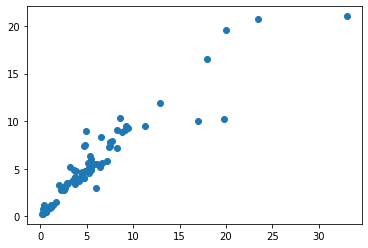

In [106]:
plt.scatter(y_test,predictions)

In [107]:
from sklearn import metrics

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8904342857142883
MSE: 4.02897583897363
RMSE: 2.0072308883069807


## Using XGBoost Regressor

In [57]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [58]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [59]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [60]:
xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:57:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.2s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[06:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe99d6e1450>,
                                        'n_estimators': <scipy.

In [62]:
xgb.best_score_

-2.583738185956024

In [63]:
xgb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [64]:
predictions=xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


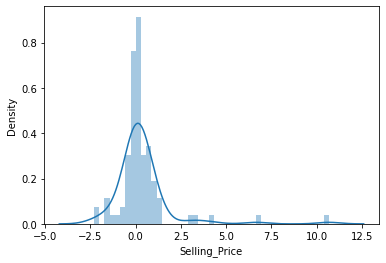

In [65]:
sns.distplot(y_test-predictions)

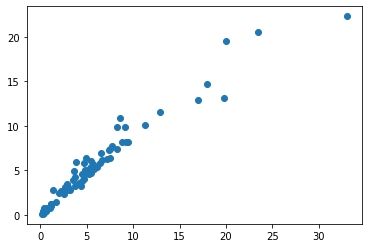

In [66]:
plt.scatter(y_test,predictions)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7469347548091804
MSE: 2.5684632032821106
RMSE: 1.602642568785102


## Using Catboost Regresssor

In [71]:
from catboost import CatBoostRegressor

In [69]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 19 kB/s 


In [72]:
cb=CatBoostRegressor()

In [73]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [74]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
cb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................
0:	learn: 4.9398622	total: 46.4ms	remaining: 46.4s
1:	learn: 4.7805986	total: 51.8ms	remaining: 25.9s
2:	learn: 4.5730251	total: 54.1ms	remaining: 18s
3:	learn: 4.4161829	total: 55.7ms	remaining: 13.9s
4:	learn: 4.2856056	total: 59.2ms	remaining: 11.8s
5:	learn: 4.1268798	total: 60.2ms	remaining: 9.97s
6:	learn: 3.9895888	total: 61.1ms	remaining: 8.67s
7:	learn: 3.8391546	total: 62.4ms	remaining: 7.74s
8:	learn: 3.7310291	total: 66.1ms	remaining: 7.28s
9:	learn: 3.6173828	total: 66.6ms	remaining: 6.59s
10:	learn: 3.4712492	total: 67.2ms	remaining: 6.04s
11:	learn: 3.3483253	total: 68.1ms	remaining: 5.6s
12:	learn: 3.2450271	total: 70.4ms	remaining: 5.34s
13:	learn: 3.1400164	total: 70.9ms	remaining: 5s
14:	learn: 3.0260343	total: 71.5ms	remaining: 4.7s
15:	learn: 2.9346526	total: 72.1ms	remaining: 4.44s
16:	learn: 2.8376114	total: 76.2ms	remaining: 4.4s
17

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


65:	learn: 1.4768047	total: 168ms	remaining: 2.38s
66:	learn: 1.4698340	total: 168ms	remaining: 2.34s
67:	learn: 1.4615997	total: 170ms	remaining: 2.33s
68:	learn: 1.4535999	total: 171ms	remaining: 2.3s
69:	learn: 1.4464307	total: 173ms	remaining: 2.3s
70:	learn: 1.4383887	total: 174ms	remaining: 2.28s
71:	learn: 1.4320577	total: 174ms	remaining: 2.25s
72:	learn: 1.4256605	total: 175ms	remaining: 2.22s
73:	learn: 1.4194823	total: 175ms	remaining: 2.19s
74:	learn: 1.4134373	total: 175ms	remaining: 2.16s
75:	learn: 1.4057293	total: 179ms	remaining: 2.17s
76:	learn: 1.4000260	total: 179ms	remaining: 2.15s
77:	learn: 1.3931128	total: 180ms	remaining: 2.12s
78:	learn: 1.3875548	total: 180ms	remaining: 2.1s
79:	learn: 1.3567595	total: 180ms	remaining: 2.07s
80:	learn: 1.3513549	total: 181ms	remaining: 2.05s
81:	learn: 1.3461680	total: 181ms	remaining: 2.02s
82:	learn: 1.3395707	total: 184ms	remaining: 2.03s
83:	learn: 1.3345228	total: 184ms	remaining: 2.01s
84:	learn: 1.3283791	total: 186ms	

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
9:	learn: 4.2760919	total: 5.39ms	remaining: 534ms
10:	learn: 4.2020315	total: 5.8ms	remaining: 522ms
11:	learn: 4.1197982	total: 8.03ms	remaining: 661ms
12:	learn: 4.0440011	total: 8.78ms	remaining: 667ms
13:	learn: 3.9689971	total: 9.43ms	remaining: 664ms
14:	learn: 3.8934753	total: 10.1ms	remaining: 663ms
15:	learn: 3.8217422	total: 10.9ms	remaining: 668ms
16:	learn: 3.7506630	total: 11.5ms	remaining: 667ms
17:	learn: 3.6870472	total: 12.2ms	remaining: 666ms
18:	learn: 3.6201237	total: 12.9ms	remaining: 665ms
19:	learn: 3.5482027	total: 13.5ms	remaining: 662ms
20:	learn: 3.4989642	total: 14.1ms	remaining: 658ms
21:	learn: 3.4312459	total: 14.6ms	remaining: 647ms
22:	learn: 3.3665531	total: 15.1ms	remaining: 644ms
23:	learn: 3.3049089	total: 15.4ms	remaining: 627ms
24:	learn: 3.2541210	total: 15.8ms	remaining: 615ms
25:	learn: 3.1940723	total: 16ms	remaining: 600ms
26:	learn: 3.1461119	total: 16.4ms	remaining: 590ms
27:	learn: 3.0897

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


0:	learn: 4.7513958	total: 1.75ms	remaining: 1.75s
1:	learn: 4.5119164	total: 3.1ms	remaining: 1.54s
2:	learn: 4.3301300	total: 3.99ms	remaining: 1.33s
3:	learn: 4.1363250	total: 4.38ms	remaining: 1.09s
4:	learn: 3.9718172	total: 4.79ms	remaining: 954ms
5:	learn: 3.8095917	total: 5.19ms	remaining: 860ms
6:	learn: 3.6425018	total: 8.23ms	remaining: 1.17s
7:	learn: 3.4983529	total: 9.2ms	remaining: 1.14s
8:	learn: 3.3606511	total: 9.55ms	remaining: 1.05s
9:	learn: 3.2383294	total: 9.92ms	remaining: 982ms
10:	learn: 3.1338057	total: 10.3ms	remaining: 923ms
11:	learn: 3.0202997	total: 14.2ms	remaining: 1.17s
12:	learn: 2.9199965	total: 14.9ms	remaining: 1.13s
13:	learn: 2.8628436	total: 15.8ms	remaining: 1.11s
14:	learn: 2.7647330	total: 16.3ms	remaining: 1.07s
15:	learn: 2.6790815	total: 16.8ms	remaining: 1.03s
16:	learn: 2.6271657	total: 17.3ms	remaining: 1s
17:	learn: 2.5505273	total: 17.8ms	remaining: 972ms
18:	learn: 2.4868576	total: 18.3ms	remaining: 946ms
19:	learn: 2.4771422	total:

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fe988cb4a90>,
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
cb.best_score_

-3.2179271237932716

In [77]:
cb.best_params_

{'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

In [78]:
predictions=cb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


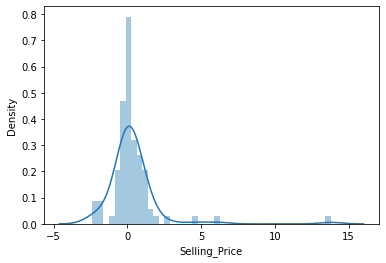

In [79]:
sns.distplot(y_test-predictions)

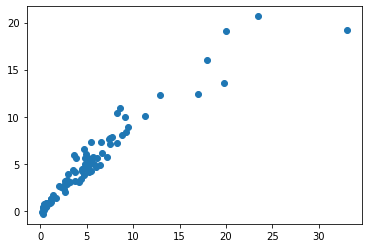

In [80]:
plt.scatter(y_test,predictions)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8568669682476366
MSE: 3.4731227057809524
RMSE: 1.8636315906801302


Using LGBM Regressor

In [82]:
from lightgbm import LGBMRegressor

In [83]:
lb=LGBMRegressor()  

In [84]:
lb.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [85]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [86]:
lb = RandomizedSearchCV(estimator = lb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [87]:
lb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299, total=   0.0s
[CV] gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299 
[CV]  gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299, total=   0.0s
[CV] gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299 
[CV]  gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299, total=   0.0s
[CV] gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299 
[CV]  gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299, total=   0.0s
[CV] gamma=0.3005575058716044, learning_rate=0.2424

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe9885e7710>,
           

In [88]:
lb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [89]:
lb.best_score_

-5.776105814158411

In [90]:
predictions=lb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


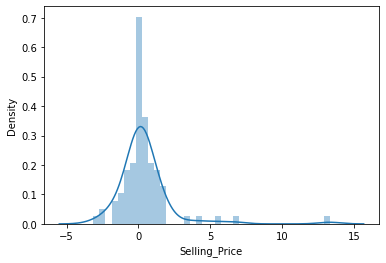

In [91]:
sns.distplot(y_test-predictions)

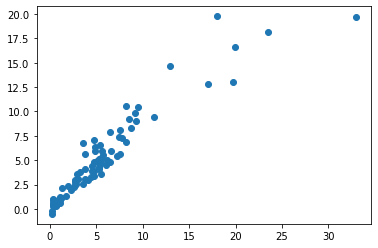

In [92]:
plt.scatter(y_test,predictions)

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0132939743818592
MSE: 3.934934144002637
RMSE: 1.9836668429962319
